[View in Colaboratory](https://colab.research.google.com/github/kundajelab/igsvm/blob/master/lsgkmexplain_NFE2.ipynb)

In [1]:
!rm -r lsgkm
!git clone https://github.com/kundajelab/lsgkm.git lsgkm
%cd lsgkm/src
!make
%cd ../..

rm: cannot remove 'lsgkm': No such file or directory
Cloning into 'lsgkm'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 254 (delta 94), reused 85 (delta 45), pack-reused 111
Receiving objects: 100% (254/254), 514.90 KiB | 5.66 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/lsgkm/src
g++ -Wall -Wconversion -O3 -fPIC -c libsvm.cpp
g++ -Wall -Wconversion -O3 -fPIC -c libsvm_gkm.c
g++ -Wall -Wconversion -O3 -fPIC gkmtrain.c libsvm.o libsvm_gkm.o -o gkmtrain -lm -lpthread
g++ -Wall -Wconversion -O3 -fPIC gkmpredict.c libsvm.o libsvm_gkm.o -o gkmpredict -lm -lpthread
g++ -Wall -Wconversion -O3 -fPIC gkmexplain.c libsvm.o libsvm_gkm.o -o gkmexplain -lm -lpthread
/content


In [2]:
#for motif discovery and visualization
!rm -rf tfmodisco
!git clone https://github.com/kundajelab/tfmodisco.git
%cd tfmodisco
#check out a specific version for reproducibility
!git checkout v0.4.2.2-alpha
!pip install .
%cd ..

Cloning into 'tfmodisco'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 2513 (delta 10), reused 20 (delta 6), pack-reused 2483
Receiving objects: 100% (2513/2513), 31.83 MiB | 29.45 MiB/s, done.
Resolving deltas: 100% (1641/1641), done.
/content/tfmodisco
Note: checking out 'v0.4.2.2-alpha'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at e5268ab Update setup.py
Processing /content/tfmodisco
  Running setup.py bdist_wheel for modisco ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-e60sj3ly/wheels/37/3

In [11]:
!head lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.tr.fa

>chr10:22605206-22605441
GCGGGCGCGGAGGCGGGCGGGGAGGCCCCGCAGCCCGCGCCGCCGCCAGCCGCCCCGAGCCGCGTGCGCGCGCGGCCGCATCAGCTGAGCGCGCGGCGCGTGTCACGTGGTGTGCGTGTCGAAGGTCACGGCGCGCTCACAATGGAGCTCTCGGAGTCTGTGCAGAAAGGCTTCCAGATGCTGGCGGATCCCCGCTCCTTCGACTCCAACGCCTTCACGCTTCTCCTCCGGGCGGC
>chr10:32217700-32217935
ACGGCTACGGCCGCGGCCGGCCCGTCCCCGCAGGCTGGCCTCTGAGGGAGGGTAAGTTACAGGGCACGTCGGAGCGCGCCGGCGCGGGGGCGGGGCTCACGTGACGCGCGGGGGCGGGGCGGGAGGCTCACGTGATGGCCCGGGCGAGCTGGGCGGGCGCGGGTCTCCGGGACGGTCTGGGGTGGCTAGGGGGTGCGGCGCCCGGCGGGGATCCGAATAGGGGGCAGCCAGCGTAC
>chr10:43892618-43892853
CGCGCGGCGGCTCACCACGCCAGGGACTGGCCCGTCGGCCCCGAGGAGGCGCGGGGTCCGGAGTCCGGGAAGCGGAGGCCTCGTGATCCAAGACCGGCAGCCGGACGTGGGTCACGGGGTGCAGAGGAGGAAGTGCCATTGCCGGGCCCGCCAAGATGTCACCAATGGGAAACGCGTGCCTGCAGGTGCGGCCCCGTGGCCCGCGCGCTGGGCCCAGGCAGGAAGTGGGGGAAGGA
>chr10:45965717-45965952
GTTTACACATTCTCTCAGGTTGTTGGCAGAACACAGCTCCCTAAAGCTTGAGGACTGAGGGCCCGTCTGCTGGCTGACTCCACCTGGGGCAGGCCACATGCATCTGCAGTCACATGACCCCTTCCCATCTTCAAAGCCCACTTGCGGTATCAATCTCTCTGACTTCCCTTTCTGCCACCAGTCAGAGAA

In [3]:
#actual importance scores on each base - test set
!lsgkm/src/gkmexplain -m 0 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt
#actual importance scores on each base - training set
!lsgkm/src/gkmexplain -m 0 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.tr.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.explain.txt

INFO 2018-10-15 04:45:23: Number of threads is set to 1
INFO 2018-10-15 04:45:23: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2018-10-15 04:45:24: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt
INFO 2018-10-15 04:45:30: 69 scored
INFO 2018-10-15 04:45:30: Number of threads is set to 1
INFO 2018-10-15 04:45:30: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2018-10-15 04:45:31: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.explain.txt
INFO 2018-10-15 04:45:40: 100 scored
INFO 2018-10-15 04:45:50: 200 scored
INFO 2018-10-15 04:45:59: 300 scored
INFO 2018-10-15 04:46:08: 400 scored
INFO 2018-10-15 04:46:18: 500 scored
INFO 2018-10-15 04:46:28: 600 scored
INFO 2018-10-15 04:46:32: 644 scored


In [4]:
#hypothetical importance scores giving an illustration of the impact of perturbations (takes longer to compute)
#Note: technically the actual importance scores can be obtained by taking an element-wise product of the one-hot
# encoding and the hypothetical importance scores, so it's not actually necessary to compute both.
#We compute both here for illustration purposes, since the actual importance scores are considerably quicker
# to compute, likely because they don't have to consider additional mismatches.
#test set
!lsgkm/src/gkmexplain -m 1 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.hypexplain.txt
#training set
!lsgkm/src/gkmexplain -m 1 lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.tr.fa lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.hypexplain.txt

INFO 2018-10-15 04:46:33: Number of threads is set to 1
INFO 2018-10-15 04:46:33: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2018-10-15 04:46:33: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.hypexplain.txt
INFO 2018-10-15 04:46:48: 69 scored
INFO 2018-10-15 04:46:49: Number of threads is set to 1
INFO 2018-10-15 04:46:49: load model lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt
INFO 2018-10-15 04:46:49: write prediction result to lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.hypexplain.txt
INFO 2018-10-15 04:47:11: 100 scored
INFO 2018-10-15 04:47:32: 200 scored
INFO 2018-10-15 04:47:55: 300 scored
INFO 2018-10-15 04:48:17: 400 scored
INFO 2018-10-15 04:48:39: 500 scored
INFO 2018-10-15 04:49:01: 600 scored
INFO 2018-10-15 04:49:11: 644 scored


In [5]:
!head lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.model.txt

svm_type c_svc
kernel_type gkm_esttrunc
L 10
k 6
d 3
nr_class 2
total_sv 958
rho 0.379216
label 1 -1
nr_sv 435 523


In [0]:
import numpy as np

#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels)
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
#read in the fasta files and one-hot encode
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.fa"))
              if i%2==1] + [
              x.rstrip() for (i,x) in enumerate(open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.tr.fa"))
              if i%2==1]
onehot_data = np.array([one_hot_encode_along_channel_axis(x)
                         for x in fasta_seqs])
#read in the importance scores
impscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.explain.txt")
] + [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.explain.txt")
]

#read in the hyp importance scores
hypimpscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.test.hypexplain.txt")
] + [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("lsgkm/tests/wgEncodeSydhTfbsGm12878Nfe2hStdAlnRep0.train.hypexplain.txt")
]

TF-MoDISco is using the TensorFlow backend.


Original gkmexplain importance scores
0.8714090764


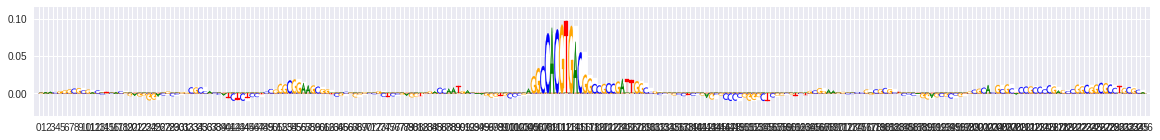

Normalized gkmexplain hypothetical scores


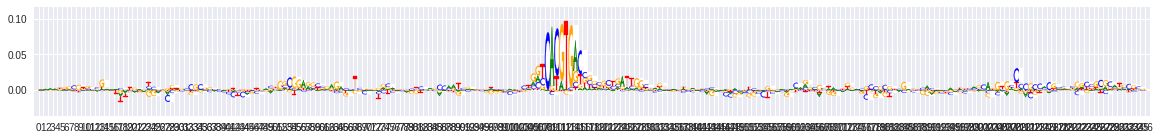

Normalized gkmexplain importance scores


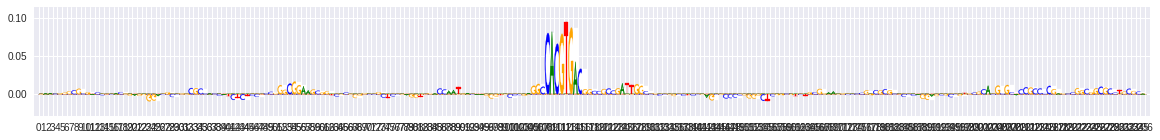

Original gkmexplain importance scores
0.49278370521000014


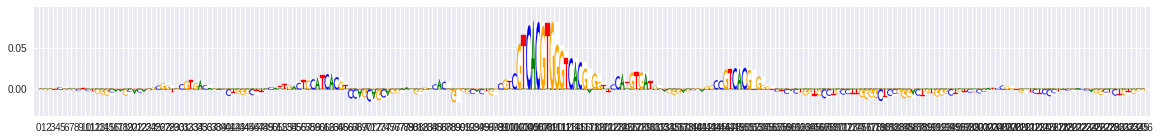

Normalized gkmexplain hypothetical scores


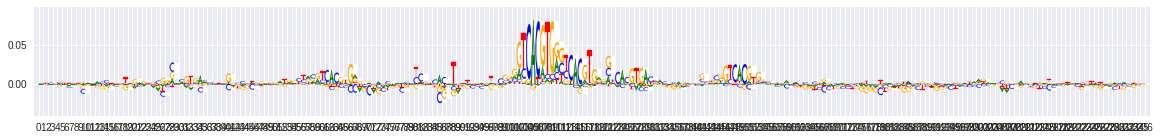

Normalized gkmexplain importance scores


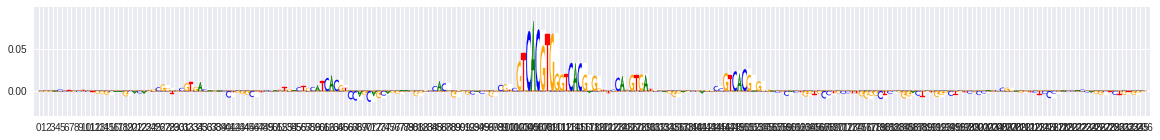

Original gkmexplain importance scores
0.36159730199999995


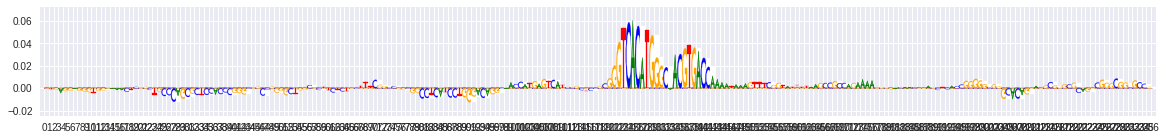

Normalized gkmexplain hypothetical scores


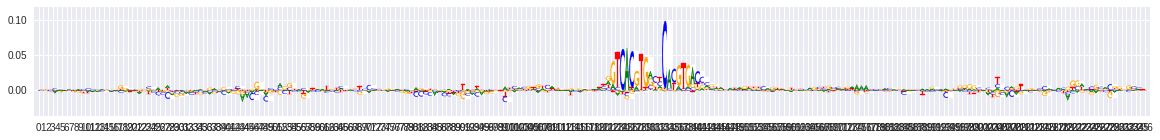

Normalized gkmexplain importance scores


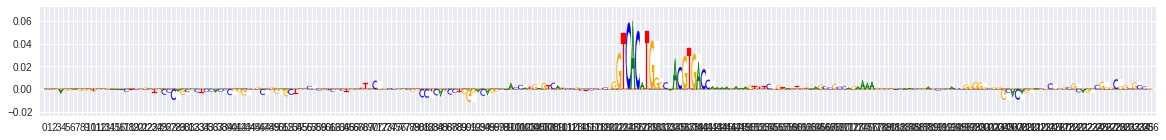

Original gkmexplain importance scores
-0.0734240638


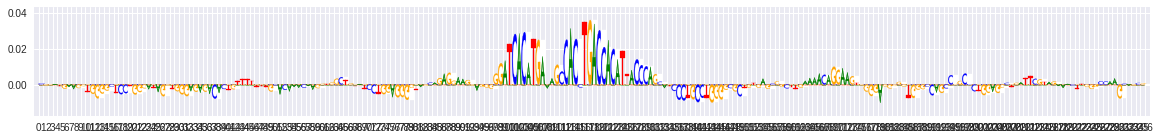

Normalized gkmexplain hypothetical scores


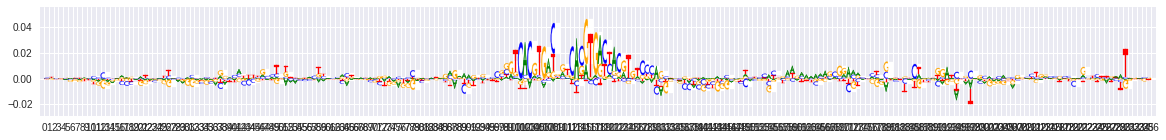

Normalized gkmexplain importance scores


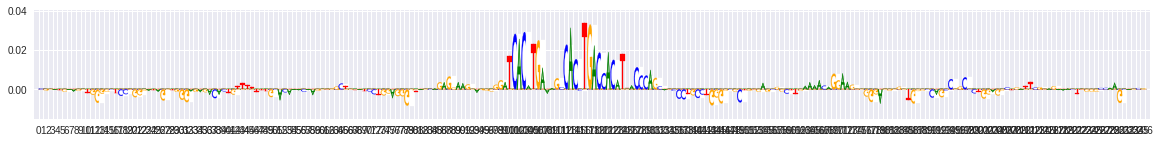

Original gkmexplain importance scores
0.8780292366999998


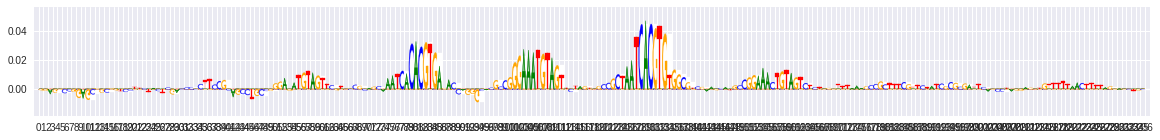

Normalized gkmexplain hypothetical scores


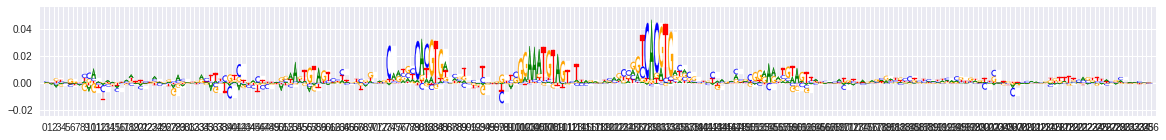

Normalized gkmexplain importance scores


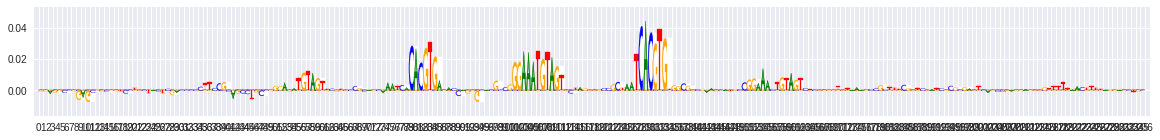

In [7]:
from modisco.visualization import viz_sequence
for i in range(5):
  print("Original gkmexplain importance scores")
  print(np.sum(impscores[i]) - 0.379216)
  viz_sequence.plot_weights(impscores[i])
  assert np.max(np.abs(onehot_data[i]*hypimpscores[i] - impscores[i])) == 0
  
  #normalize the hyp scores such that, at each position, hypothetical importance
  # scores that have the same sign as the original importance score all sum
  # up to the original importance score value. The rationale is that if
  # multiple different bases at a position could produce a similar score,
  # the specific identity of each individual base is less important.
  #Empirically, hypothetical scores like these appear to work better for
  # motif discovery.
  imp_score_each_pos = np.sum(impscores[i],axis=-1)
  imp_score_sign_each_pos = np.sign(imp_score_each_pos)
  hyp_scores_same_sign_mask = (np.sign(hypimpscores[i])*imp_score_sign_each_pos[:,None] > 0)
  #print(hyp_scores_same_sign_mask)
  hyp_scores_same_sign_imp_scores_sum = np.sum(hypimpscores[i]*hyp_scores_same_sign_mask,axis=-1)
  norm_ratio = imp_score_each_pos/hyp_scores_same_sign_imp_scores_sum
  #print(hyp_scores_same_sign_imp_scores_sum)
  norm_hyp = hypimpscores[i]*norm_ratio[:,None]
  
  print("Normalized gkmexplain hypothetical scores")
  viz_sequence.plot_weights(norm_hyp)
  print("Normalized gkmexplain importance scores")
  viz_sequence.plot_weights(norm_hyp*onehot_data[i])

On task task0
Computing windowed sums
Computing threshold
peak(mu)= 0.0024958497907214628
Mu: 2.495850e-03 +/- 7.520394e-07
Lablace_b: 0.01299438603446287 and 0.02708594706950686
Thresholds: -0.10472899835021791 and 0.15098887393200014
#fdrs pass: 0 and 8749
CDFs: 0.9997391665961411 and 0.9958402082768998
Est. FDRs: 1.0 and 0.04990894241328489


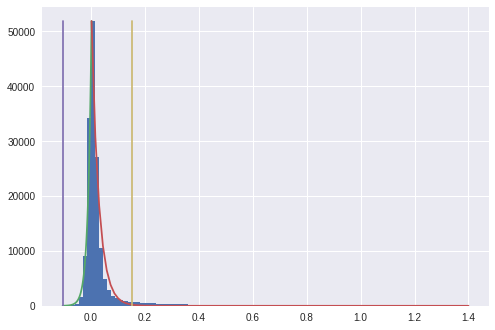

Got 1057 coords
After resolving overlaps, got 1057 seqlets
Across all tasks, the weakest laplace threshold used was: 0.9958401082768998
1057 identified in total
1 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [1056]
Idx to activities:  {0: '1'}
On metacluster 0
Metacluster size 1056
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 1056
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings


Using TensorFlow backend.


Finished embedding computation in 1.09 s
Starting affinity matrix computations
Normalization computed in 0.05 s
Cosine similarity mat computed in 0.27 s
Normalization computed in 0.04 s
Cosine similarity mat computed in 0.26 s
Finished affinity matrix computations in 0.54 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.07 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 15.9 s
Launching nearest neighbors affmat calculation job
Job completed in: 9.78 s
(Round 1) Computed affinity matrix on nearest neighbors in 27.86 s
Filtered down to 1006 of 1056
(Round 1) Retained 1006 rows out of 1056 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1006 samples in 0.001s...
[t-SNE] Computed neighbors for 1006 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1006
[t-SNE] Computed con

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    6.0s finished


Louvain completed 200 runs in 6.702746152877808 seconds
Wrote graph to binary file in 0.5254189968109131 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.866789
After 18 runs, maximum modularity is Q = 0.866857
Louvain completed 68 runs in 2.549570322036743 seconds
Preproc + Louvain took 9.983704090118408 s
Got 13 clusters after round 1
Counts:
{2: 112, 0: 171, 4: 95, 10: 23, 7: 70, 8: 60, 5: 92, 3: 98, 6: 89, 1: 126, 9: 47, 11: 16, 12: 7}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 171 seqlets
Trimmed 3 out of 171
Skipped 4 seqlets
Aggregating for cluster 1 with 126 seqlets
Trimmed 6 out of 126
Skipped 1 seqlets


/usr/local/lib/python3.6/dist-packages/modisco/core.py:972: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[:,None]),
/usr/local/lib/python3.6/dist-packages/modisco/core.py:974: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[::-1,None]),


Aggregating for cluster 2 with 112 seqlets
Trimmed 1 out of 112
Skipped 2 seqlets
Aggregating for cluster 3 with 98 seqlets
Trimmed 1 out of 98
Skipped 1 seqlets
Aggregating for cluster 4 with 95 seqlets
Trimmed 0 out of 95
Aggregating for cluster 5 with 92 seqlets
Trimmed 1 out of 92
Skipped 3 seqlets
Aggregating for cluster 6 with 89 seqlets
Trimmed 0 out of 89
Skipped 1 seqlets
Aggregating for cluster 7 with 70 seqlets
Trimmed 1 out of 70
Aggregating for cluster 8 with 60 seqlets
Trimmed 0 out of 60
Skipped 1 seqlets
Aggregating for cluster 9 with 47 seqlets
Trimmed 5 out of 47
Aggregating for cluster 10 with 23 seqlets
Trimmed 0 out of 23
Aggregating for cluster 11 with 16 seqlets
Trimmed 3 out of 16
Aggregating for cluster 12 with 7 seqlets
Trimmed 0 out of 7
(Round 2) num seqlets: 972
(Round 2) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 1.63 s
Starting affinity matrix computations
Normalization computed in 0.05 s

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    6.0s finished


Louvain completed 200 runs in 6.5894455909729 seconds
Wrote graph to binary file in 0.5804016590118408 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.826336
After 3 runs, maximum modularity is Q = 0.830588
Louvain completed 53 runs in 2.277299165725708 seconds
Preproc + Louvain took 9.65242624282837 s
Got 13 clusters after round 2
Counts:
{0: 156, 8: 68, 6: 79, 10: 17, 1: 119, 3: 106, 4: 92, 12: 7, 2: 117, 7: 78, 5: 84, 9: 42, 11: 7}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 156 seqlets
Trimmed 34 out of 156
Aggregating for cluster 1 with 119 seqlets
Trimmed 4 out of 119
Aggregating for cluster 2 with 117 seqlets
Trimmed 3 out of 117
Skipped 1 seqlets


/usr/local/lib/python3.6/dist-packages/modisco/core.py:972: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[:,None]),
/usr/local/lib/python3.6/dist-packages/modisco/core.py:974: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[::-1,None]),


Aggregating for cluster 3 with 106 seqlets
Trimmed 0 out of 106
Aggregating for cluster 4 with 92 seqlets
Trimmed 0 out of 92
Aggregating for cluster 5 with 84 seqlets
Trimmed 3 out of 84
Aggregating for cluster 6 with 79 seqlets
Trimmed 1 out of 79
Aggregating for cluster 7 with 78 seqlets
Trimmed 3 out of 78
Aggregating for cluster 8 with 68 seqlets
Trimmed 9 out of 68
Aggregating for cluster 9 with 42 seqlets
Trimmed 0 out of 42
Aggregating for cluster 10 with 17 seqlets
Trimmed 1 out of 17
Aggregating for cluster 11 with 7 seqlets
Trimmed 0 out of 7
Aggregating for cluster 12 with 7 seqlets
Trimmed 0 out of 7
Got 13 clusters
Splitting into subclusters...
Inspecting for spurious merging
Wrote graph to binary file in 0.03815722465515137 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00135046
Louvain completed 21 runs in 0.7424201965332031 seconds
Similarity is 0.9960773605709354; is_dissimilar is False
Inspecting for spurious merging
Wrote g

/usr/local/lib/python3.6/dist-packages/modisco/core.py:972: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[:,None]),
/usr/local/lib/python3.6/dist-packages/modisco/core.py:974: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[::-1,None]),


Trimmed 0 out of 374
Trimmed 1 out of 487
Trimmed 0 out of 156


/usr/local/lib/python3.6/dist-packages/modisco/core.py:972: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[:,None]),
/usr/local/lib/python3.6/dist-packages/modisco/core.py:974: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[::-1,None]),


Trimmed 0 out of 642
Skipped 1 seqlets


/usr/local/lib/python3.6/dist-packages/modisco/core.py:972: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[:,None]),
/usr/local/lib/python3.6/dist-packages/modisco/core.py:974: RuntimeWarning: invalid value encountered in true_divide
  /self.per_position_counts[::-1,None]),


Trimmed 0 out of 198
Trimmed 0 out of 10
On merging iteration 2
Computing pattern to seqlet distances
Computing pattern to pattern distances
Collapsing 0 & 1 with prob 0.0018090679160892124 and sim 0.9307850901659576
Trimmed 0 out of 839
On merging iteration 3
Computing pattern to seqlet distances
Computing pattern to pattern distances
Got 6 patterns after merging
Performing seqlet reassignment
Cross contin jaccard time taken: 0.01 s
Cross contin jaccard time taken: 0.01 s
Skipped 2 seqlets
Skipped 6 seqlets
Skipped 1 seqlets
Got 3 patterns after reassignment
Total time taken is 114.16s


In [8]:
from importlib import reload
import modisco

#normalize the hyp scores such that, at each position, hypothetical importance
# scores that have the same sign as the original importance score all sum
# up to the original importance score value. The rationale is that if
# multiple different bases at a position could produce a similar score,
# the specific identity of each individual base is less important.
#Empirically, hypothetical scores like these appear to work better for
# motif discovery. Using normalized importance scores derived by taking
# the elementwise product of the normalized hypothetical scores and
# the one-hot encoding also seems to reduce noise.
normed_hyp_scores = []
normed_impscores = []
for i in range(len(impscores)):
  imp_score_each_pos = np.sum(impscores[i],axis=-1)
  imp_score_sign_each_pos = np.sign(imp_score_each_pos)
  hyp_scores_same_sign_mask = (np.sign(hypimpscores[i])*imp_score_sign_each_pos[:,None] > 0)
  hyp_scores_same_sign_imp_scores_sum = np.sum(hypimpscores[i]*hyp_scores_same_sign_mask,axis=-1)
  norm_ratio = imp_score_each_pos/hyp_scores_same_sign_imp_scores_sum
  norm_hyp = hypimpscores[i]*norm_ratio[:,None]
  normed_hyp_scores.append(norm_hyp)
  normed_impscores.append(norm_hyp*onehot_data[i])

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                        sliding_window_size=6,
                        flank_size=4,
                        seqlets_to_patterns_factory=modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        trim_to_window_size=10,
                        initial_flank_to_add=5,
                        kmer_len=6, num_gaps=1,
                        num_mismatches=0,
                        final_min_cluster_size=10),
                   )(
                task_names=["task0"],
                contrib_scores={'task0': normed_impscores},
                #normalize the hypothetical scores to have a mean of 0 at each
                # position, for ease of visualization
                hypothetical_contribs={'task0': normed_hyp_scores},
                one_hot=onehot_data)

Motif number 1
num seqlets 840
fwd
Information-content-scaled base frequencies


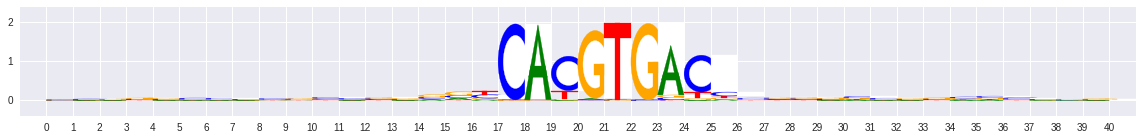

Averaged importance scores


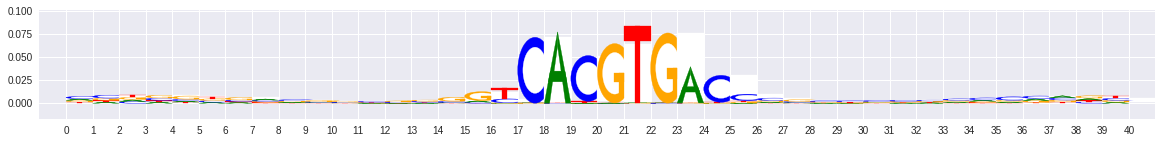

Averaged hypothetical importance scores


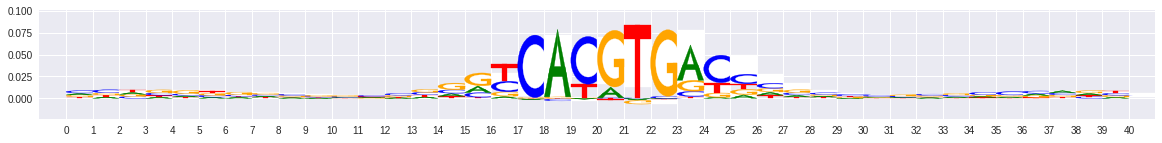

rev
Information-content-scaled base frequencies


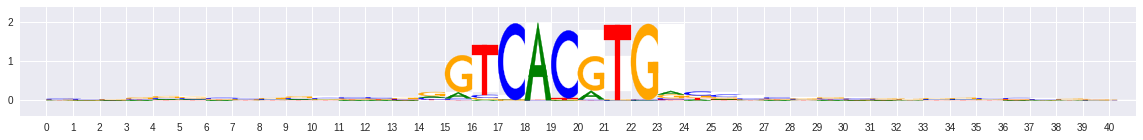

Averaged importance scores


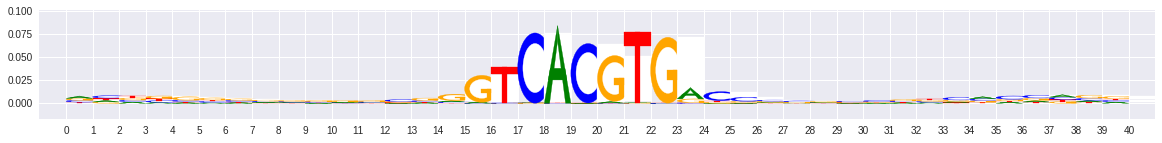

Averaged hypothetical importance scores


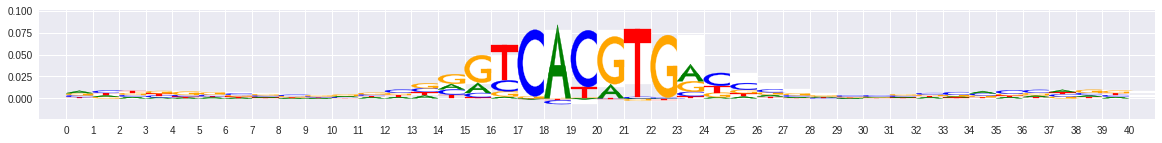

Motif number 2
num seqlets 43
fwd
Information-content-scaled base frequencies


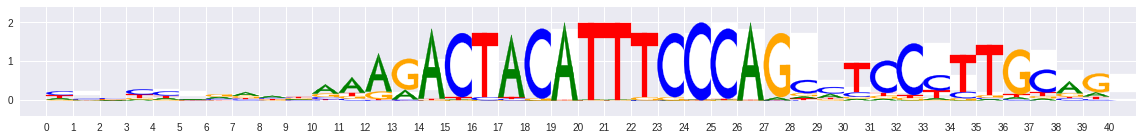

Averaged importance scores


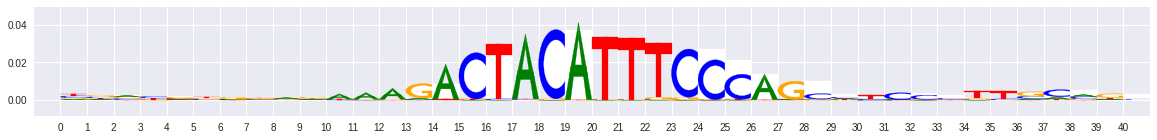

Averaged hypothetical importance scores


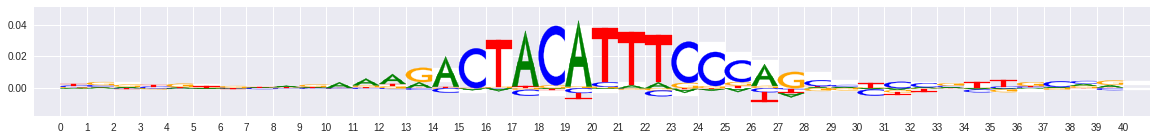

rev
Information-content-scaled base frequencies


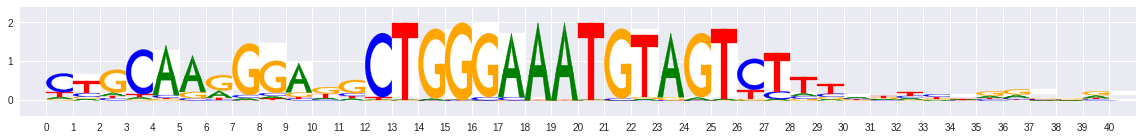

Averaged importance scores


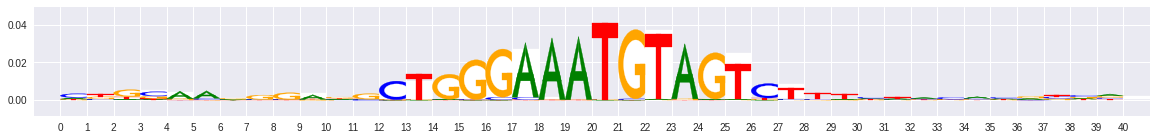

Averaged hypothetical importance scores


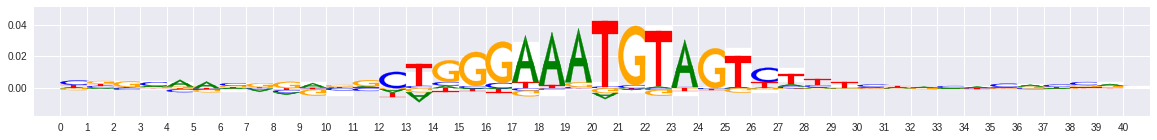

Motif number 3
num seqlets 14
fwd
Information-content-scaled base frequencies


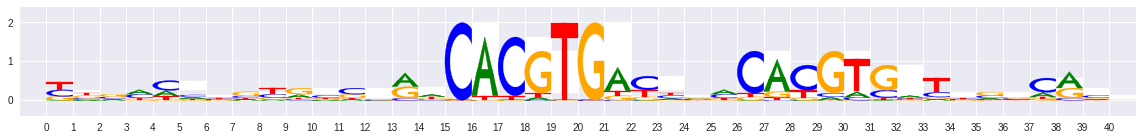

Averaged importance scores


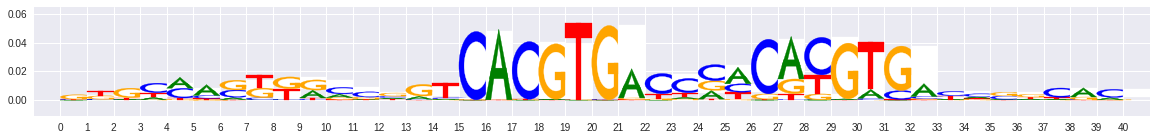

Averaged hypothetical importance scores


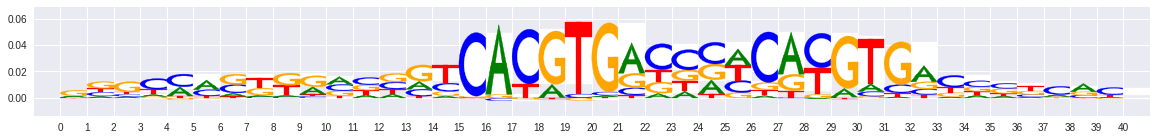

rev
Information-content-scaled base frequencies


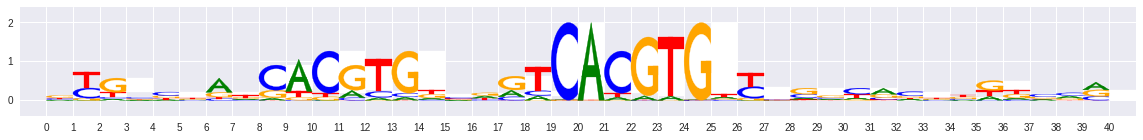

Averaged importance scores


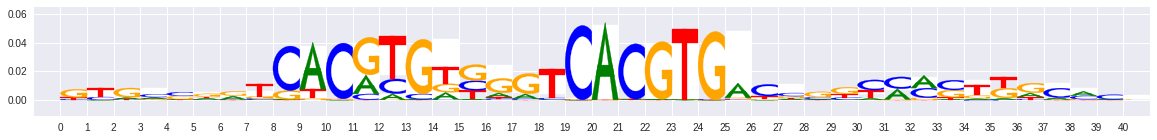

Averaged hypothetical importance scores


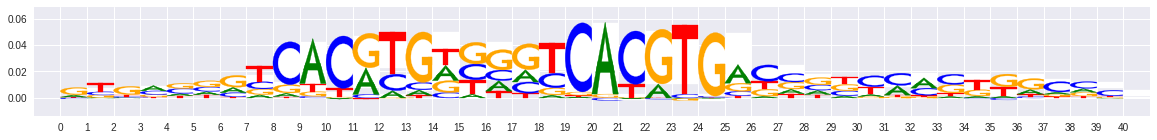

In [13]:
for i,pattern in enumerate(tfmodisco_results.metacluster_idx_to_submetacluster_results[0].seqlets_to_patterns_result.patterns):
  print("Motif number",i+1)
  print("num seqlets",len(pattern.seqlets))
  print("fwd")
  print("Information-content-scaled base frequencies")
  viz_sequence.plot_weights(viz_sequence.ic_scale(
                              pattern["sequence"].fwd,
                              np.array([0.25, 0.25, 0.25, 0.25])))
  print("Averaged importance scores")
  viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
  print("Averaged hypothetical importance scores")
  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)
  print("rev")
  print("Information-content-scaled base frequencies")
  viz_sequence.plot_weights(viz_sequence.ic_scale(
                              pattern["sequence"].rev,
                              np.array([0.25, 0.25, 0.25, 0.25])))
  print("Averaged importance scores")
  viz_sequence.plot_weights(pattern["task0_contrib_scores"].rev)
  print("Averaged hypothetical importance scores")
  viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].rev)